In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.funcs as funcs
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca

In [2]:
names = ['a1','a2','a3','a4','a5','a6','a7','a8']
df = pd.read_csv("data/HTRU_2.csv", sep=',', names=names+['cls'])
df

,a1,a2,a3,a4,a5,a6,a7,a8,cls
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [3]:
X = np.c_[tuple(df[n].values for n in names)]
Y = df['cls'].values

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, robust_scale

In [5]:
X = robust_scale(X)

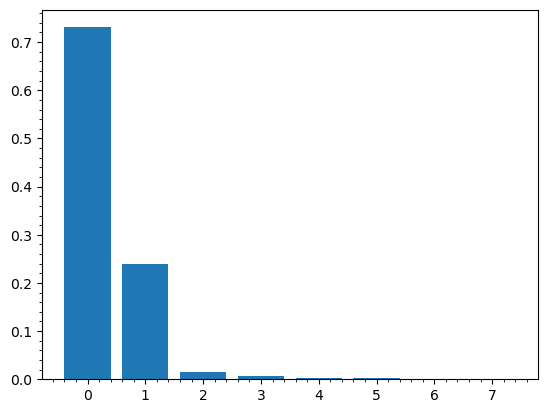

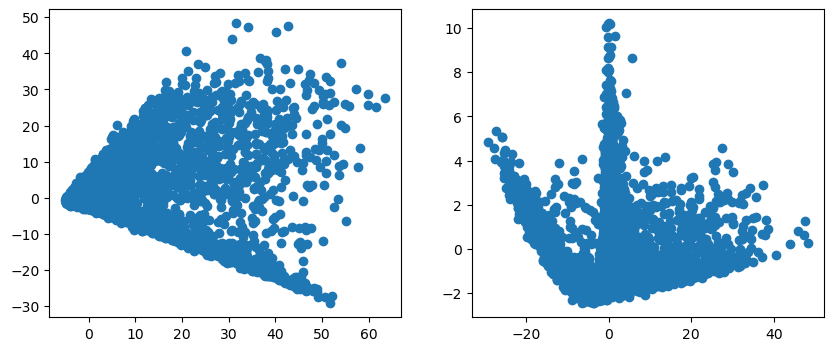

In [6]:
pca_sk = PCA()
pca_sk.fit(X)
U = pca_sk.transform(X)
plt.bar(range(len(names)), pca_sk.explained_variance_ratio_)
plt.minorticks_on()
plt.show()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(U[:,0], U[:,1])
plt.subplot(1,2,2)
plt.scatter(U[:,1], U[:,2])
plt.show()

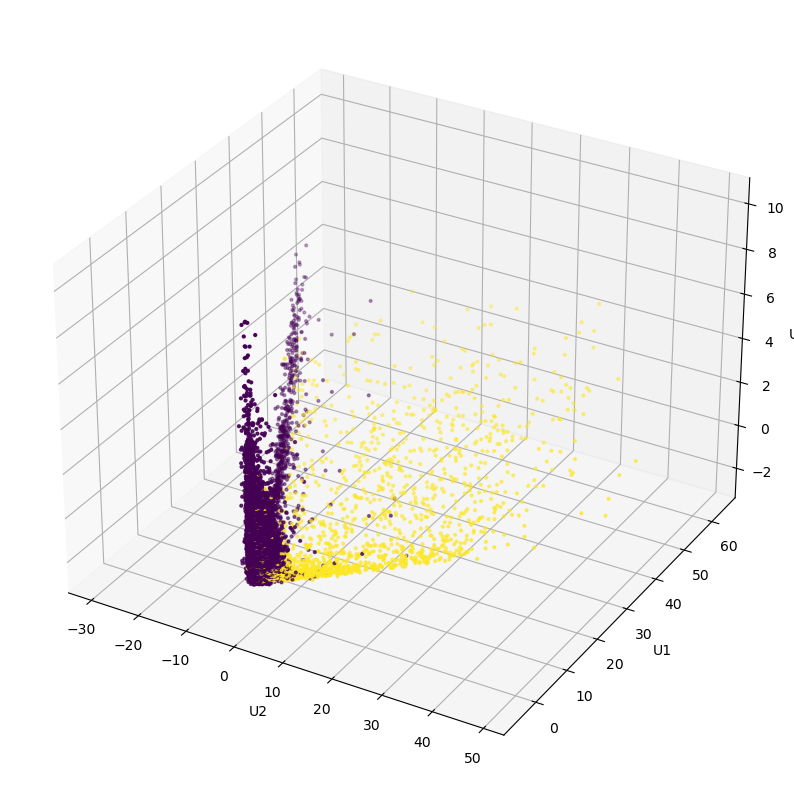

In [7]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(10, 12)
ax.scatter(U[:,1], U[:,0], U[:,2], s=4, c=Y)
# ax.set(xticklabels=[],
#        yticklabels=[],
#        zticklabels=[])
ax.set_xlabel('U2')
ax.set_ylabel('U1')
ax.set_zlabel('U3')
plt.show()

In [8]:
X0 = X

In [9]:
smooth_quantile = funcs.QuantileFunc(0.9, funcs.Sqrt(0.001))
wma = af.averaging_function("WM", rhofunc=smooth_quantile)
amf = af.averaging_function("AM")

[-0.153 -0.046  0.571  1.408  2.771  0.562 -0.026  0.209]


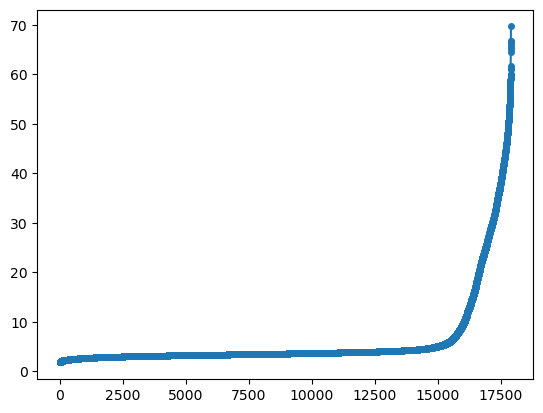

In [10]:
c0 = pca.location(X0)
print(c0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='o', markersize=4)
plt.show()

[-0.079 -0.059  0.291  0.746  1.104  0.458  0.032  0.227]


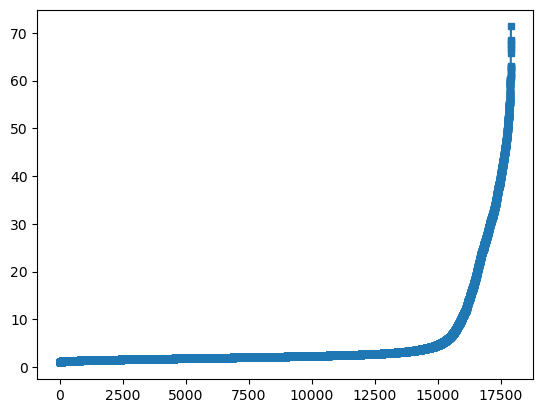

In [11]:
wma = af.averaging_function("WM", rhofunc=smooth_quantile)
c = pca.robust_location(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=4)
plt.show()

In [13]:
X1 = X0 - c
X1_0 = X0 - c0

In [14]:
a1_0, L1_0 = pca.find_pc(X1_0)
print(L1_0, a1_0)

81.03084578762311 [-0.052 -0.013  0.167  0.391  0.892  0.124 -0.064 -0.042]


In [15]:
wma = af.averaging_function("WM", rhofunc=smooth_quantile)
a1, L1 = pca.find_robust_pc(X1, wma)
print(L1, a1)

60.39828862180041 [ 0.002  0.028  0.004 -0.013  0.986  0.140 -0.069 -0.049]


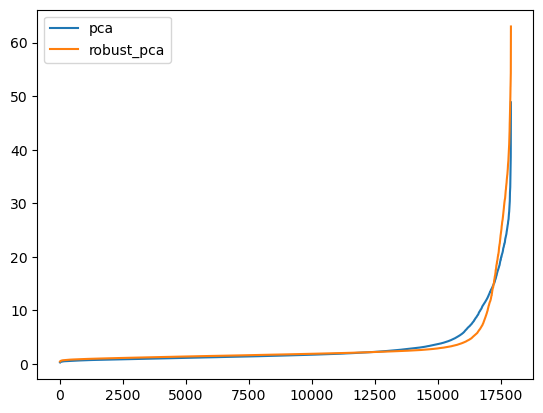

In [15]:
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), label='pca')
plt.plot(sorted(pca.distance_line(X1, a1)), label='robust_pca')
plt.legend()
plt.show()

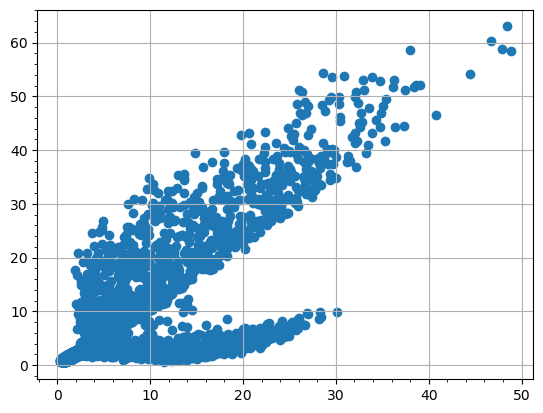

In [16]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [17]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

In [18]:
a2_0, L2_0 = pca.find_pc(X2_0)
print(L2_0, a2_0)

26.469636017639438 [-0.116 -0.091  0.338  0.825 -0.427 -0.032  0.015  0.007]


In [19]:
wma = af.averaging_function("WM", rhofunc=smooth_quantile)
a2, L2 = pca.find_robust_pc(X2, wma)
print(L2, a2)

7.98487770779549 [ 0.219  0.140 -0.476 -0.838 -0.009 -0.050  0.022  0.016]


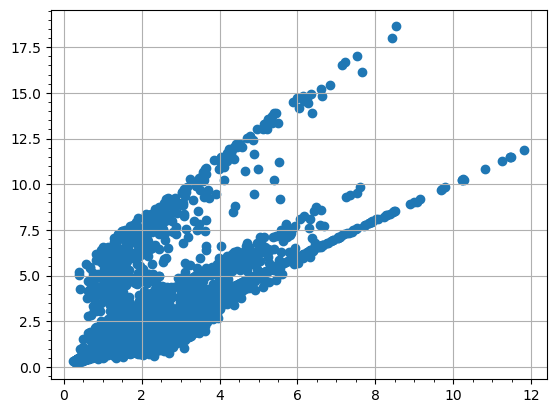

In [20]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

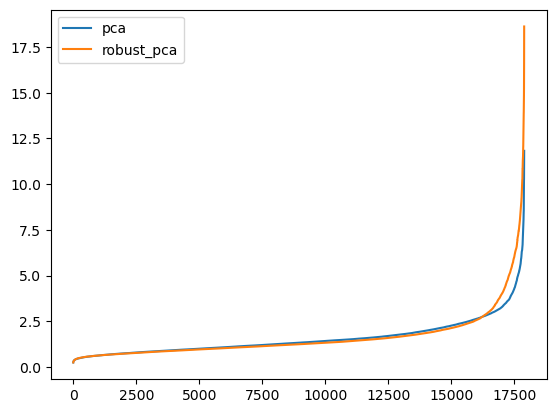

In [21]:
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), label='pca')
plt.plot(sorted(pca.distance_line(X2, a2)), label='robust_pca')
plt.legend()
plt.show()

In [22]:
X3 = pca.project(X2, a2)
X3_0 = pca.project(X2_0, a2_0)

In [23]:
a3_0, L3_0 = pca.find_pc(X3_0)
print(L3_0, a3_0)

1.6826150320471958 [ 0.001 -0.010 -0.039  0.045  0.124 -0.471  0.534  0.688]


In [24]:
wma = af.averaging_function("WM", rhofunc=smooth_quantile)
a3, L3 = pca.find_robust_pc(X3, wma)
print(L3, a3)

1.0951690148345774 [-0.057 -0.071  0.018  0.015  0.148 -0.425  0.561  0.689]


In [ ]:
plt.plot(sorted(pca.distance_line(X3_0, a3_0)), label='pca')
plt.plot(sorted(pca.distance_line(X3, a3)), label='robust_pca')
plt.legend()
plt.show()

In [ ]:
plt.scatter(pca.distance_line(X3_0, a3_0), pca.distance_line(X3, a3))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [ ]:
U1_0 = pca.project_line(X1_0, a1_0)
U1 = pca.project_line(X1, a1)
U2_0 = pca.project_line(X1_0, a2_0)
U2 = pca.project_line(X1, a2)
U3_0 = pca.project_line(X1_0, a3_0)
U3 = pca.project_line(X1, a3)

def positive(U):
    if max(U[U>0]) < max(abs(U[U<0])):
        U = -U
    return U

U1 = positive(U1)
U2 = positive(U2)
U3 = positive(U3)
U1_0 = positive(U1_0)
U2_0 = positive(U2_0)
U3_0 = positive(U3_0)


In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.scatter(U1, U2, c=Y, edgecolors='k', s=16)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(2,2,2)
plt.scatter(U1, U3, c=Y, edgecolors='k', s=16)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.subplot(2,2,3)
plt.scatter(U1_0, U2_0, c=Y, edgecolors='k', s=16)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(2,2,4)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.scatter(U1_0, U3_0, c=Y, edgecolors='k', s=16)
plt.tight_layout()
plt.savefig('fig/robust_pca_HTRU.eps')
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, subplot_kw={"projection": "3d"})
fig.set_size_inches(14, 6)
ax1, ax2 = axes
ax1.set_proj_type('persp', 2)
ax1.scatter(U2, U1, U3, s=16, c=Y, cmap=plt.cm.Greys_r, edgecolors='k', linewidth=0.5)

ax1.plot([0, 0], [0, U1.max()], [0, 0], color='k', linewidth=1.0)
ax1.plot([0, U2.max()], [0, 0], [0, 0], color='k', linewidth=1.0)
ax1.plot([0, 0], [0, 0], [0, U3.max()], color='k', linewidth=1.0)

# ax1.set_xlim(U1.min(), U1.max())
# ax1.set_ylim(U2.min(), U2.max())
# ax1.set_zlim(U3.min(), U3.max())

ax1.set_xlabel('PC2')
ax1.set_ylabel('PC1')
ax1.set_zlabel('PC3', rotation='vertical')

ax1.set_title('Robust PCA')

ax2.scatter(U2_0, U1_0, U3_0, s=9, c=Y, cmap=plt.cm.Greys_r, edgecolors='k', linewidth=0.5)

ax2.plot([0, 0], [0, U1_0.max()], [0, 0], color='k', linewidth=1.0)
ax2.plot([0, U2_0.max()], [0, 0], [0, 0], color='k', linewidth=1.0)
ax2.plot([0, 0], [0, 0], [0, U3_0.max()], color='k', linewidth=1.0)

# ax2.set_xlim(U1_0.min(), U1_0.max())
# ax2.set_ylim(U2_0.min(), U2_0.max())
# ax2.set_zlim(U3_0.min(), U3_0.max())

ax2.set_xlabel('PC2')
ax2.set_ylabel('PC1')
ax2.set_zlabel('PC3', rotation='vertical')

ax2.set_title('Classical PCA')

fig.set_tight_layout(True)

plt.savefig('fig/robust_pca_HTRU_1.eps')

plt.show()